In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
from scipy import stats

In [2]:
import json
plt_properties = json.load(open('utils/plt_properties.json'))
fig_width = plt_properties['fig_width']
plt.rcParams.update(plt_properties['plt_params'])

In [3]:
sys.path.append(os.path.join(os.getcwd(), 'utils'))
from distributions import density_plot, cumulative_plot
from permutation_test import permutation_test_repeated
from variables import min_pred_col, vol_pred_col, min_pred_col_day, vol_pred_col_day, mlr_pred_col, target_col

In [4]:
df = pd.read_csv('../Data/dataset_mlr.csv')
df_base = df[df['source'] == 'sk1']
df_followup = df[df['source'] == 'sk2']
df_mlr = df[~df[mlr_pred_col].isna()]

/tmp/ipykernel_15809/3900636746.py:1: DtypeWarning: Columns (12,22,23,24,25,35,36,37,38,39,44,48,49,53,54,55,61,72,76,121,122,124,125,127,136,138,139,140,141,142,143,144,152,157,158,159,161,162,163,210,216,218,219,221,233,251,252,254,503,509,511,513,515,519,523,525,527,529) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/dataset_mlr.csv')


In [5]:
# sanity check
(df.una_u24_mmol - (df.una_un_mmol + df.una_ud_mmol)).max()

1.525878911934342e-05

# 2) Distributions

## 2.1) Datapoints

Text(0.5, 1.0, 'MLR')

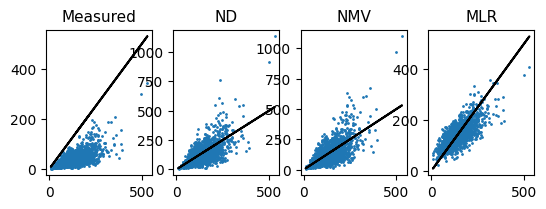

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(fig_width, 0.3 * fig_width))

# no correction
ax[0].scatter(df[target_col], df.una_un_mmol, s=1)
ax[0].plot(df[target_col], df[target_col], c='k')
ax[0].set_title('Measured')

# by duration
ax[1].scatter(df[target_col], df[min_pred_col], s=1)
ax[1].plot(df[target_col], df[target_col], c='k')
ax[1].set_title('ND')

# by average volume
ax[2].scatter(df[target_col], df[vol_pred_col], s=1)
ax[2].plot(df[target_col], df[target_col], c='k')
ax[2].set_title('NMV')

# MLR
ax[3].scatter(df_mlr[target_col], df_mlr[mlr_pred_col], s=1)
ax[3].plot(df_mlr[target_col], df_mlr[target_col], c='k')
ax[3].set_title('MLR')

## 2.2) Density and cumulative

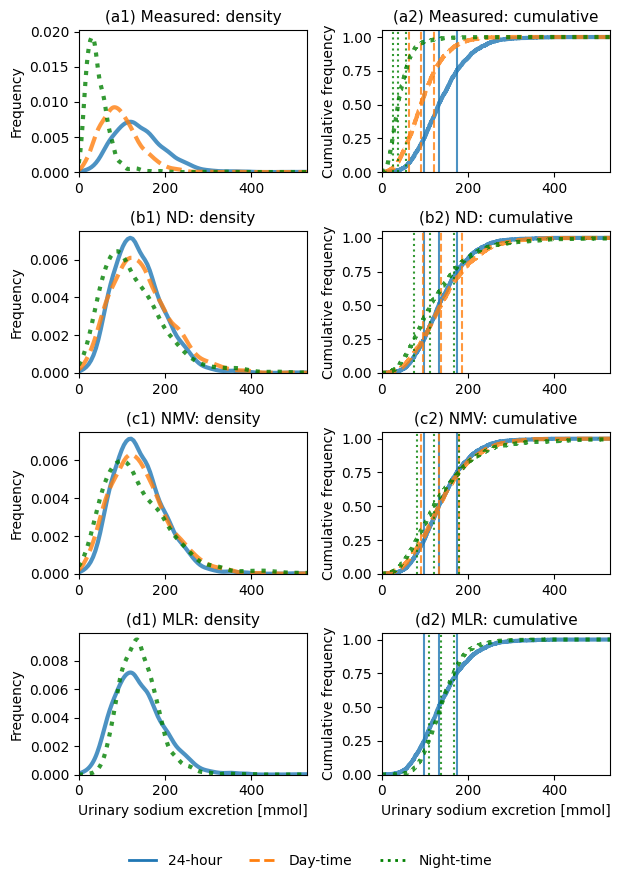

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(fig_width, 1.4 * fig_width), sharey=False, sharex=False)

# Define labels and line styles for the legend
labels = ['24-hour', 'Day-time', 'Night-time']
linestyles = ['-', '--', ':']
colors = list(plt.rcParams["axes.prop_cycle"].by_key()["color"][:2]) + ['g']

# DENSITY
max_ = np.max([df[target_col], df.una_ud_mmol, df.una_un_mmol])
density_plot(df[target_col], ax[0][0], max_, linestyle=linestyles[0], label=labels[0], c=colors[0])
density_plot(df.una_ud_mmol, ax[0][0], max_, linestyle=linestyles[1], label=labels[1], c=colors[1])
density_plot(df.una_un_mmol, ax[0][0], max_, linestyle=linestyles[2], label=labels[2], c=colors[2])
ax[0][0].set_title('(a1) Measured: density')

night = df[min_pred_col]
day = df[min_pred_col_day]
max_ = np.max([df[target_col], night, day])
density_plot(df[target_col], ax[1][0], max_, linestyle=linestyles[0], c=colors[0])
density_plot(day, ax[1][0], max_, linestyle=linestyles[1], c=colors[1])
density_plot(night, ax[1][0], max_, linestyle=linestyles[2], c=colors[2])
ax[1][0].set_title('(b1) ND: density')

night = df[vol_pred_col]
day = df[vol_pred_col_day]
max_ = np.max([df[target_col], night, day])
density_plot(df[target_col], ax[2][0], max_, linestyle=linestyles[0], c=colors[0])
density_plot(day, ax[2][0], max_, linestyle=linestyles[1], c=colors[1])
density_plot(night, ax[2][0], max_, linestyle=linestyles[2], c=colors[2])
ax[2][0].set_title('(c1) NMV: density')

night = df['mlr_preds'].dropna()
max_ = np.max([df[target_col].max(), night.max()])
density_plot(df[target_col], ax[3][0], max_, linestyle=linestyles[0], c=colors[0])
density_plot(night, ax[3][0], max_, linestyle=linestyles[2], c=colors[2])
ax[3][0].set_title('(d1) MLR: density')

for axis in ax[:,0]:
    axis.set_ylabel('Frequency')
    axis.set_ylim(bottom=0.)
    axis.set_xlim(left=0, right=np.max(df[target_col]))
ax[-1,0].set_xlabel('Urinary sodium excretion [mmol]')

# CUMULATIVE
max_ = np.max([df[target_col], df.una_ud_mmol, df.una_un_mmol])
cumulative_plot(df[target_col], ax[0][1], max_, linestyle=linestyles[0], c=colors[0])
cumulative_plot(df.una_ud_mmol, ax[0][1], max_, linestyle=linestyles[1], c=colors[1])
cumulative_plot(df.una_un_mmol, ax[0][1], max_, linestyle=linestyles[2], c=colors[2])
ax[0][1].set_title('(a2) Measured: cumulative')

night = df[min_pred_col]
day = df[min_pred_col_day]
max_ = np.max([df[target_col], night, day])
cumulative_plot(df[target_col], ax[1][1], max_, linestyle=linestyles[0], c=colors[0])
cumulative_plot(day, ax[1][1], max_, linestyle=linestyles[1], c=colors[1])
cumulative_plot(night, ax[1][1], max_, linestyle=linestyles[2], c=colors[2])
ax[1][1].set_title('(b2) ND: cumulative')

night = df[vol_pred_col]
day = df[vol_pred_col_day]
max_ = np.max([df[target_col], night, day])
cumulative_plot(df[target_col], ax[2][1], max_, linestyle=linestyles[0], c=colors[0])
cumulative_plot(day, ax[2][1], max_, linestyle=linestyles[1], c=colors[1])
cumulative_plot(night, ax[2][1], max_, linestyle=linestyles[2], c=colors[2])
ax[2][1].set_title('(c2) NMV: cumulative')

night = df_mlr[mlr_pred_col]
max_ = np.max([df[target_col].max(), night.max()])
cumulative_plot(df[target_col], ax[3][1], max_, linestyle=linestyles[0], c=colors[0])
cumulative_plot(night, ax[3][1], max_, linestyle=linestyles[2], c=colors[2])
ax[3][1].set_title('(d2) MLR: cumulative')

for axis in ax[:,1]:
    axis.set_ylabel('Cumulative frequency')
    axis.set_xlim(left=0, right=np.max(df[target_col]))
    axis.set_ylim(bottom=0, top=1.05)
ax[-1,1].set_xlabel('Urinary sodium excretion [mmol]')

# Create a common legend below all plots
handles = [plt.Line2D([0], [0], linestyle=ls, color=c, lw=2) for ls, c in zip(linestyles, colors)]
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=10, frameon=False)

fig.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit the legend

fig.savefig('../Figures/distributions/urinary_sodium_distr.png', dpi=500)

Truncated for better visualization!

## 2.3) Test for goodness of fit

In [9]:
# Wilcoxon signed-rank test
print('Duration normalization')
print('Significant difference 24h-night:', round(stats.wilcoxon(df[target_col], df[min_pred_col], method='exact').pvalue, 4))
print('Significant difference 24h-day:', round(stats.wilcoxon(df[target_col], df[min_pred_col_day], method='exact').pvalue, 4))
print('Significant difference day-night:', round(stats.wilcoxon(df[min_pred_col_day], df[min_pred_col], method='exact').pvalue, 4))

print('\nVolume normalization')
print('Significant difference 24h-night:', round(stats.wilcoxon(df[target_col], df[vol_pred_col], method='exact').pvalue, 4))
print('Significant difference 24h-day:', round(stats.wilcoxon(df[target_col], df[vol_pred_col_day], method='exact').pvalue, 4))
print('Significant difference day-night:', round(stats.wilcoxon(df[min_pred_col_day], df[vol_pred_col], method='exact').pvalue, 4))

print('\nRegression model')
print('Significant difference target-pred:', round(stats.wilcoxon(df_mlr[target_col], df_mlr[mlr_pred_col], method='exact').pvalue, 4))

Duration normalization
Significant difference 24h-night: 0.0
Significant difference 24h-day: 0.0
Significant difference day-night: 0.0

Volume normalization
Significant difference 24h-night: 0.0012
Significant difference 24h-day: 0.0032
Significant difference day-night: 0.0

Regression model
Significant difference target-pred: 0.0381


## 2.4) Permutation tests for mean, median, std

### 2.4.1) Mean

In [6]:
def mean(x, y, axis=None):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def mean_perm_test_repeated(x, y, x_id, y_id):
    return permutation_test_repeated(
        x, y, x_id, y_id, mean, n_resamples=1e4, permutation_type='samples', alternative='two-sided', random_state=42
    ).pvalue

print('Duration normalization')
print(f'Significant difference 24h-night ({round(df[target_col].mean(), 1)} vs {round(df[min_pred_col].mean(), 1)}):',
      round(mean_perm_test_repeated(df[target_col], df[min_pred_col], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference 24h-day ({round(df[target_col].mean(), 1)} vs {round(df[min_pred_col_day].mean(), 1)}):',
      round(mean_perm_test_repeated(df[target_col], df[min_pred_col_day], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference day-night ({round(df[min_pred_col_day].mean(), 1)} vs {round(df[min_pred_col].mean(), 1)}):',
      round(mean_perm_test_repeated(df[min_pred_col_day], df[min_pred_col], df['sk1_id'], df['sk1_id']), 4))

print('\nVolume normalization')
print(f'Significant difference 24h-night: ({round(df[target_col].mean(), 1)} vs {round(df[vol_pred_col].mean(), 1)})',
      round(mean_perm_test_repeated(df[target_col], df[vol_pred_col], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference 24h-day ({round(df[target_col].mean(), 1)} vs {round(df[vol_pred_col_day].mean(), 1)}):',
      round(mean_perm_test_repeated(df[target_col], df[vol_pred_col_day], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference day-night ({round(df[vol_pred_col_day].mean(), 1)} vs {round(df[vol_pred_col].mean(), 1)}):',
      round(mean_perm_test_repeated(df[min_pred_col_day], df[vol_pred_col], df['sk1_id'], df['sk1_id']), 4))

print('\nRegression model')
print(f'Significant difference mean ({round(df_mlr[target_col].mean(), 1)} vs {round(df_mlr[mlr_pred_col].mean(), 1)}):',
      round(mean_perm_test_repeated(df_mlr[target_col], df_mlr[mlr_pred_col], df_mlr['sk1_id'], df_mlr['sk1_id']), 4))

Duration normalization


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference 24h-night (140.2 vs 130.6): 0.0002
Significant difference 24h-day (140.2 vs 145.7): 0.0002
Significant difference day-night (145.7 vs 130.6): 0.0002

Volume normalization
Significant difference 24h-night: (140.2 vs 139.0) 0.5013
Significant difference 24h-day (140.2 vs 140.9): 0.3812
Significant difference day-night (140.9 vs 139.0): 0.0068

Regression model
Significant difference mean (140.6 vs 140.7): 0.9581


### 2.4.2) Median

In [7]:
def median(x, y, axis=None):
    return np.median(x, axis=axis) - np.median(y, axis=axis)

def median_perm_test_repeated(x, y, x_id, y_id):
    return permutation_test_repeated(
        x, y, x_id, y_id, median, n_resamples=1e4, permutation_type='samples', alternative='two-sided', random_state=42
    ).pvalue

print('Duration normalization')
print(f'Significant difference 24h-night ({round(df[target_col].median(), 1)} vs {round(df[min_pred_col].median(), 1)}):',
      round(median_perm_test_repeated(df[target_col], df[min_pred_col], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference 24h-day ({round(df[target_col].median(), 1)} vs {round(df[min_pred_col_day].median(), 1)}):',
      round(median_perm_test_repeated(df[target_col], df[min_pred_col_day], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference day-night ({round(df[min_pred_col_day].median(), 1)} vs {round(df[min_pred_col].median(), 1)}):',
      round(median_perm_test_repeated(df[min_pred_col_day], df[min_pred_col], df['sk1_id'], df['sk1_id']), 4))

print('\nVolume normalization')
print(f'Significant difference 24h-night: ({round(df[target_col].median(), 1)} vs {round(df[vol_pred_col].median(), 1)})',
      round(median_perm_test_repeated(df[target_col], df[vol_pred_col], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference 24h-day ({round(df[target_col].median(), 1)} vs {round(df[vol_pred_col_day].median(), 1)}):',
      round(median_perm_test_repeated(df[target_col], df[vol_pred_col_day], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference day-night ({round(df[vol_pred_col_day].median(), 1)} vs {round(df[vol_pred_col].median(), 1)}):',
      round(median_perm_test_repeated(df[min_pred_col_day], df[vol_pred_col], df['sk1_id'], df['sk1_id']), 4))

print('\nRegression model')
print(f'Significant difference median ({round(df_mlr[target_col].median(), 1)} vs {round(df_mlr[mlr_pred_col].median(), 1)}):',
      round(median_perm_test_repeated(df_mlr[target_col], df_mlr[mlr_pred_col], df_mlr['sk1_id'], df_mlr['sk1_id']), 4))

Duration normalization


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference 24h-night (131.9 vs 112.7): 0.0002


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference 24h-day (131.9 vs 137.4): 0.0002


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference day-night (137.4 vs 112.7): 0.0002

Volume normalization


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference 24h-night: (131.9 vs 120.5) 0.0002


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference 24h-day (131.9 vs 132.8): 0.5097


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference day-night (132.8 vs 120.5): 0.0002

Regression model


/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Significant difference median (131.7 vs 136.6): 0.0004


### 2.4.3) Standard deviation

In [8]:
def std(x, y, axis=None):
    return np.std(x, axis=axis) - np.std(y, axis=axis)

def std_perm_test_repeated(x, y, x_id, y_id):
    return permutation_test_repeated(
        x, y, x_id, y_id, std, n_resamples=1e4, permutation_type='samples', alternative='two-sided', random_state=42
    ).pvalue
print('Duration normalization')
print(f'Significant difference 24h-night ({round(df[target_col].std(), 1)} vs {round(df[min_pred_col].std(), 1)}):',
      round(std_perm_test_repeated(df[target_col], df[min_pred_col], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference 24h-day ({round(df[target_col].std(), 1)} vs {round(df[min_pred_col_day].std(), 1)}):',
      round(std_perm_test_repeated(df[target_col], df[min_pred_col_day], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference day-night ({round(df[min_pred_col_day].std(), 1)} vs {round(df[min_pred_col].std(), 1)}):',
      round(std_perm_test_repeated(df[min_pred_col_day], df[min_pred_col], df['sk1_id'], df['sk1_id']), 4))

print('\nVolume normalization')
print(f'Significant difference 24h-night: ({round(df[target_col].std(), 1)} vs {round(df[vol_pred_col].std(), 1)})',
      round(std_perm_test_repeated(df[target_col], df[vol_pred_col], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference 24h-day ({round(df[target_col].std(), 1)} vs {round(df[vol_pred_col_day].std(), 1)}):',
      round(std_perm_test_repeated(df[target_col], df[vol_pred_col_day], df['sk1_id'], df['sk1_id']), 4))
print(f'Significant difference day-night ({round(df[vol_pred_col_day].std(), 1)} vs {round(df[vol_pred_col].std(), 1)}):',
      round(std_perm_test_repeated(df[min_pred_col_day], df[vol_pred_col], df['sk1_id'], df['sk1_id']), 4))

print('\nRegression model')
print(f'Significant difference std ({round(df_mlr[target_col].std(), 1)} vs {round(df_mlr[mlr_pred_col].std(), 1)}):',
      round(std_perm_test_repeated(df_mlr[target_col], df_mlr[mlr_pred_col], df_mlr['sk1_id'], df_mlr['sk1_id']), 4))

Duration normalization
Significant difference 24h-night (59.8 vs 84.6): 0.0002
Significant difference 24h-day (59.8 vs 69.9): 0.0002
Significant difference day-night (69.9 vs 84.6): 0.0002

Volume normalization
Significant difference 24h-night: (59.8 vs 89.0) 0.0002
Significant difference 24h-day (59.8 vs 67.4): 0.0002
Significant difference day-night (67.4 vs 89.0): 0.0002

Regression model
Significant difference std (60.3 vs 45.3): 0.0002


## 2.5) Base vs follow-up

In [9]:
print(f'Permutation test mean: {df_base[target_col].mean()} => {df_followup[target_col].mean()}')
print(stats.permutation_test((df_base[target_col], df_followup[target_col]), mean, vectorized=True, n_resamples=1e4,
    permutation_type='independent', alternative='two-sided', random_state=42).pvalue)
print(f'Permutation test median: {df_base[target_col].median()} => {df_followup[target_col].median()}')
print(stats.permutation_test((df_base[target_col], df_followup[target_col]), median, vectorized=True, n_resamples=1e4,
    permutation_type='independent', alternative='two-sided', random_state=42).pvalue)
print(f'Permutation test std: {df_base[target_col].std()} => {df_followup[target_col].std()}')
print(stats.permutation_test((df_base[target_col], df_followup[target_col]), std, vectorized=True, n_resamples=1e4,
    permutation_type='independent', alternative='two-sided', random_state=42).pvalue)
round(stats.ks_2samp(df_base[target_col], df_followup[target_col]).pvalue, 3)

Permutation test mean: 142.92545183319825 => 136.90312114151558
0.0337966203379662
Permutation test median: 134.17842484316674 => 129.20275862068962
0.13878612138786123
Permutation test std: 60.92802213078445 => 58.17666834891653
0.36476352364763526


0.322

## 2.6) High sodium

In [10]:
na_mol_weight = 22.989769
thresh = 2000 / na_mol_weight

In [11]:
meas = df[target_col] > thresh
print(f'Prevalence (measured): {round(meas.mean(), 3)}.\n')

# duration
print('ND:')
d_n = df[min_pred_col] > thresh
print(f' - Night:',
      f'prevalence {round(d_n.mean(), 3)}',
      f'sensitivity {round((meas * d_n).mean() / meas.mean(), 3)}',
      f'specificity {round(((~meas) * (~d_n)).mean() / (~meas).mean(), 3)}.')
d_d = df[min_pred_col_day] > thresh
print(f' - Day:',
      f'prevalence {round(d_d.mean(), 3)}',
      f'sensitivity {round((meas * d_d).mean() / meas.mean(), 3)}',
      f'specificity {round(((~meas) * (~d_d)).mean() / (~meas).mean(), 3)}.\n')

# volume
print('NMV:')
v_n = df[vol_pred_col] > thresh
print(f' - Night:',
      f'prevalence {round(v_n.mean(), 3)}',
      f'sensitivity {round((meas * v_n).mean() / meas.mean(), 3)}',
      f'specificity {round(((~meas) * (~v_n)).mean() / (~meas).mean(), 3)}.')
v_d = df[vol_pred_col_day] > thresh
print(f' - Day:',
      f'prevalence {round(v_d.mean(), 3)}',
      f'sensitivity {round((meas * v_d).mean() / meas.mean(), 3)}',
      f'specificity {round(((~meas) * (~v_d)).mean() / (~meas).mean(), 3)}.\n')

# MLR
print('MLR:')
df_sub = df[~(df.mlr_preds.isna())]
meas = df_sub[target_col] > thresh
mlr = df_sub['mlr_preds'] > thresh
print(f' - Night:',
      f'prevalence {round(mlr.mean(), 3)}',
      f'sensitivity {round((meas * mlr).mean() / meas.mean(), 3)}',
      f'specificity {round(((~meas) * (~mlr)).mean() / (~meas).mean(), 3)}.')

Prevalence (measured): 0.815.

ND:
 - Night: prevalence 0.672 sensitivity 0.766 specificity 0.745.
 - Day: prevalence 0.801 sensitivity 0.943 specificity 0.825.

NMV:
 - Night: prevalence 0.707 sensitivity 0.795 specificity 0.68.
 - Day: prevalence 0.78 sensitivity 0.925 specificity 0.858.

MLR:
 - Night: prevalence 0.907 sensitivity 0.958 specificity 0.322.
